In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikit_posthocs as sp
from scipy import stats
import re
#import Orange

In [7]:
def getBenchmarkSet(name):
    m = re.match("([a-zA-z]+)",name)
    if m is not None:
        return m.group(0)
    return ""

In [4]:
target = "HV"

df = pd.read_csv(f"results_{target}.csv")

df["benchmark"] = df["instance"].apply(getBenchmarkSet)

#df["difference"] = (df["config"] - df["default"]) / df["default"]
df["difference"] *= 100
df

,Unnamed: 0,instance,default,config,configuration,difference,solver,benchmark
0,0,MMF1e,61.509254,61.494581,-mutPolynomial_eta '24' -mutPolynomial_p '0.5...,-0.023856,SMS-EMOA,MMF
1,1,DTLZ2,120.209183,120.205218,-mutPolynomial_eta '24' -mutPolynomial_p '0.5...,-0.003299,SMS-EMOA,DTLZ
2,2,MMF14,0.843966,0.843643,-mutPolynomial_eta '24' -mutPolynomial_p '0.5...,-0.038219,SMS-EMOA,MMF
3,3,DTLZ7,0.487196,0.487167,-mutPolynomial_eta '24' -mutPolynomial_p '0.5...,-0.005953,SMS-EMOA,DTLZ
4,4,MMF14a,0.843403,0.843843,-mutPolynomial_eta '24' -mutPolynomial_p '0.5...,0.052188,SMS-EMOA,MMF
...,...,...,...,...,...,...,...,...
226,226,MMF2,0.569118,0.214540,-T '39' -Tr '15' -aggfunction 'wt' -archive '...,-62.303087,MOEAD,MMF
227,227,MMF3,0.620276,0.595049,-T '39' -Tr '15' -aggfunction 'wt' -archive '...,-4.067129,MOEAD,MMF
228,228,BiObjBBOB1,4158.026653,4210.850374,-T '39' -Tr '15' -aggfunction 'wt' -archive '...,1.270404,MOEAD,BiObjBBOB
229,229,DTLZ1,120.872121,120.873656,-T '39' -Tr '15' -aggfunction 'wt' -archive '...,0.001270,MOEAD,DTLZ


In [28]:
df.groupby("solver")["difference"].describe()

,count,mean,std,min,25%,50%,75%,max
solver,,,,,,,,
MOEAD,33.0,-6.716747,39.533327,-209.281773,0.001270,0.035542,2.025619,54.880206
MOGSA,31.0,inf,NaN,-199.781976,-3.974340,0.683374,26.606727,inf
MOLE,33.0,-inf,NaN,-inf,-7.837797,-2.680203,-0.016166,39.834978
NSGA-II,33.0,-0.835049,3.650755,-20.069471,-0.041501,-0.001591,0.004768,0.271796
SMS-EMOA,33.0,-0.718029,4.218880,-19.607242,-0.369646,-0.023988,-0.000607,8.169747
higamo,33.0,-inf,NaN,-inf,-13.640704,-0.061668,1.349287,78.673557
omnioptimizer,33.0,-0.187029,0.953125,-5.180537,-0.002453,0.000301,0.050970,0.368361


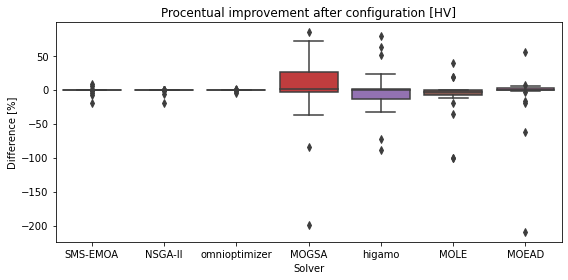

In [17]:
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(x="solver",y="difference",data=df)

ax.set_title(f"Procentual improvement after configuration [{target}]")
ax.set_ylabel("Difference [%]")
ax.set_xlabel("Solver")
plt.tight_layout()
plt.savefig("boxplot.pdf")

/Users/jeroen/Software/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:4489: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5)
/Users/jeroen/Software/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:4488: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))


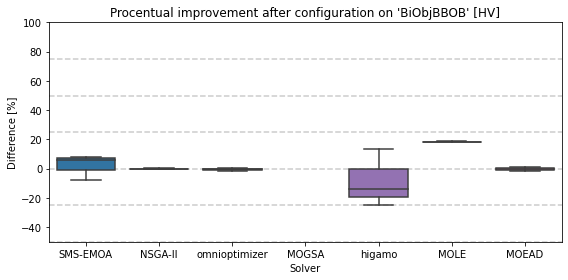

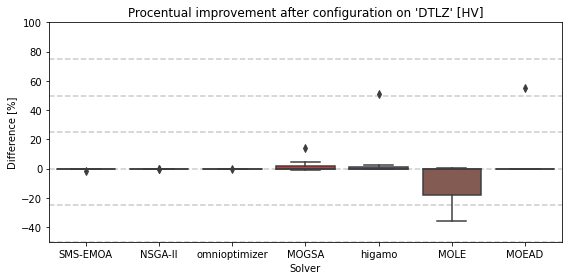

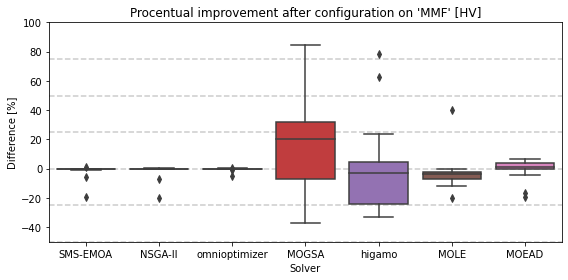

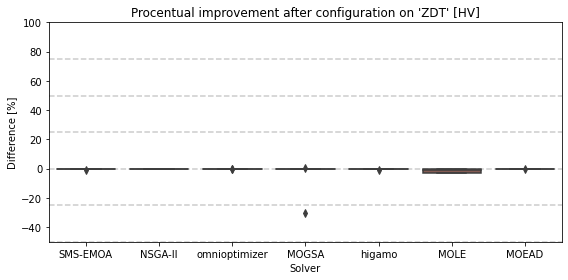

In [18]:
for benchmark, bdf in df.groupby("benchmark"):
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.boxplot(x="solver",y="difference",data=bdf)

    ax.set_title(f"Procentual improvement after configuration on '{benchmark}' [{target}]")
    ax.set_ylabel("Difference [%]")
    ax.set_xlabel("Solver")
    ax.set_ylim(-50,100)
    ax.hlines([p for p in range(-100,100,25)],*ax.get_xlim(),color=(0.8,0.8,0.8),ls="--",zorder=-10)
    plt.tight_layout()
    plt.savefig("boxplotz.pdf")
    plt.show()

In [19]:
scores = df[["default","config"]].to_numpy()
scores = scores[scores > 0]
scores.min()

0.0118843375776447

SMS-EMOA
[0.01, 1000.0]


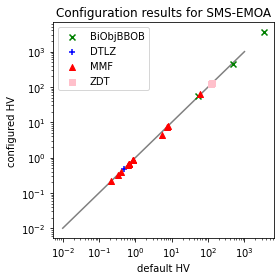

NSGA-II
[0.01, 1000.0]


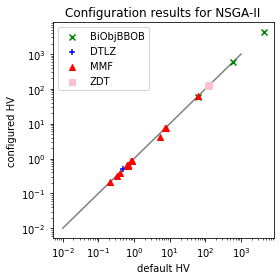

omnioptimizer
[0.01, 1000.0]


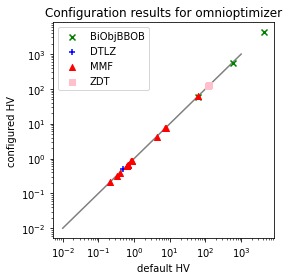

MOGSA
[0.01, 1000.0]


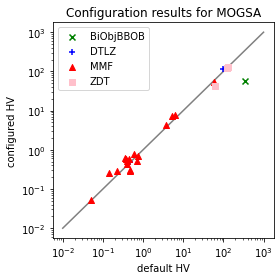

higamo
[0.01, 1000.0]


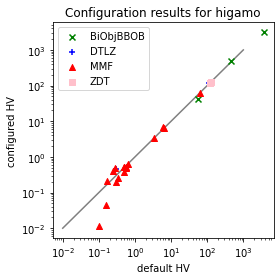

MOLE
[0.01, 1000.0]


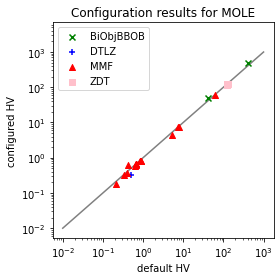

MOEAD
[0.01, 1000.0]


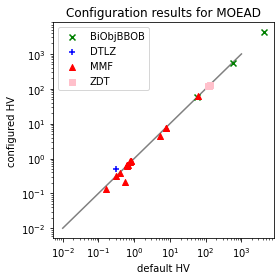

'###TEST'

In [20]:
for solver in df["solver"].unique():
    print(solver)
    result_df = df[df["solver"] == solver]
    
    fig, ax = plt.subplots(figsize=(4,4))
    
    colors = ["green", "blue", "red", "pink"]
    marker = ["x", "+", "^", "s"]
    
    for i, (benchmark, bdf) in enumerate(result_df.groupby("benchmark")):
        ax.scatter(bdf["default"],
                   bdf["config"],
                   c=colors[i], 
                   marker=marker[i], 
                   label=benchmark)
    
    scores = df[["default","config"]].to_numpy()
    scores = scores[scores > 0]
    
    minp = 10**np.floor(np.log10(scores.min()))
    maxp = 10**np.floor(np.log10(scores.max()))
    ranged = [minp, maxp]
    print(ranged)
    ax.plot(ranged, ranged, c=(0.5,0.5,0.5), zorder=-1)
    ax.legend()
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(f"default {target}")
    ax.set_ylabel(f"configured {target}")
    ax.set_title(f"Configuration results for {solver}")
    plt.tight_layout()
    plt.savefig(f"comp_{solver}.pdf")
    plt.show()
display("###TEST")        

In [37]:
gdf = df.groupby(["instance","solver"])["default","config"].sum().unstack()
#gdf = df.groupby(["instance","solver"])["difference"].sum().unstack()
gdf[gdf < 0] = np.nan
display(gdf)
gdf.to_html(f"resultstable-{target}.html")

/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_98842/3010569555.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  gdf = df.groupby(["instance","solver"])["default","config"].sum().unstack()


default                                                    \
solver            MOEAD       MOGSA        MOLE      NSGA-II     SMS-EMOA   
instance                                                                    
BiObjBBOB1  4158.026653    0.000000    0.000000  4254.188397  3349.289096   
BiObjBBOB2   574.972034  350.049866  413.444718   583.073663   493.251141   
BiObjBBOB3    58.898874    0.000000   42.577351    60.204366    51.156862   
DTLZ1        120.872121  115.535670  120.865523   120.873119   120.873264   
DTLZ2        120.206459  120.150776  120.063737   120.208750   120.209183   
DTLZ3        120.199595   99.724468  119.969351   120.207914   120.209965   
DTLZ4               NaN         NaN         NaN   120.209332   120.210881   
DTLZ5        120.207113  120.148405  120.134995   120.208639   120.208401   
DTLZ6        120.167405  120.156347  120.025075   120.176054   120.210772   
DTLZ7          0.313675    0.485257    0.490478     0.485414     0.487196   
MMF1           0.624247    0.401062    0.665393     0.658682     0.662844   
MMF10          5.299468    3.674853    5.362791     5.329470     5.343982   
MMF11          7.656647    6.276075    7.757258     7.686316     7.729981   
MMF12          0.387836    0.000000    0.393780     0.391542     0.392398   
MMF14          0.780417    0.594281    0.856996     0.835176     0.843966   
MMF14a         0.769740    0.689725    0.855040     0.827333     0.843403   
MMF15          0.823829    0.142323    0.874666     0.853680     0.861458   
MMF15a         0.809142    0.737403    0.875079     0.848226     0.862475   
MMF1e         61.166312   59.876750   61.396769    61.505548    61.509254   
MMF1z          0.617128    0.473191    0.666257     0.659602     0.663726   
MMF2           0.569118    0.394652    0.433439     0.654009     0.635348   
MMF3           0.620276    0.463505    0.641830     0.652768     0.646388   
MMF4           0.307850    0.228689    0.329143     0.325339     0.328789   
MMF5           0.638915    0.384205    0.677205     0.670001     0.674445   
MMF6           0.632524    0.356082    0.663593     0.656419     0.661611   
MMF7           0.654312    0.439637    0.666589     0.662935     0.665849   
MMF8           0.160251    0.050351    0.210189     0.207944     0.210989   
MMF9           7.537213    5.333791    7.599367     7.554558     7.572731   
ZDT1         120.656043  120.314043  120.661459   120.659760   120.661571   
ZDT2         120.310342  120.161134  120.317291   120.325875   120.327208   
ZDT3         128.764300  128.764027  128.700561   128.774906   128.775927   
ZDT4         120.614833  119.639077  120.664567   120.660115   120.661374   
ZDT6         117.504351   60.792494         NaN   117.513710   117.514943   

                                            config                           \
solver           higamo omnioptimizer        MOEAD       MOGSA         MOLE   
instance                                                                      
BiObjBBOB1  3635.969403   4243.761964  4210.850374         NaN  3648.860180   
BiObjBBOB2   442.916627    579.812269   566.111420   57.118143   491.643367   
BiObjBBOB3    54.650778     60.190629    58.833270    0.000000    50.297218   
DTLZ1        119.058950    120.872668   120.873656  120.455480   120.211569   
DTLZ2        119.901987    120.208718   120.209981  120.195379   120.204264   
DTLZ3        113.044525    120.197674   120.209973  113.828165   119.959024   
DTLZ4        120.055431    120.208340   120.209950  109.615656   119.950321   
DTLZ5        119.879996    120.208571   120.209972  120.195408   120.205203   
DTLZ6        120.159818    120.208575   120.210115  120.167316   120.192274   
DTLZ7          0.298318      0.485228     0.485821    0.480847     0.313801   
MMF1           0.513153      0.657840     0.638771    0.505920     0.647560   
MMF10          3.468181      4.271782     4.288558    4.174799     4.272437   
MMF11          6.189933      7.713132     7.716020    7.53

In [140]:
gdf = df.groupby(["instance","solver"])["config"].sum().unstack().astype(float)
display(gdf)

gdf[gdf < 0] = np.NaN
#gdf = gdf.drop(columns="DN-NSGAII")
gdf = gdf.dropna()

print(len(gdf))



solver,MOEAD,MOGSA,MOLE,NSGA-II,SMS-EMOA,higamo,omnioptimizer
instance,,,,,,,
BiObjBBOB1,2.214564,1.960183,3.349267,2.288031,3.093994,2.121967,3.863727
BiObjBBOB2,1.932142,1.661965,3.439010,3.127337,1.252044,2.976457,2.964254
BiObjBBOB3,3.251715,1.709684,1.984864,1.997231,1.377261,2.003462,2.604480
DTLZ1,1.665780,1.528392,1.723983,1.499989,1.499946,1.647816,1.498191
DTLZ2,1.663989,1.481535,1.512607,1.500466,1.499703,1.768211,1.659773
DTLZ3,1.267106,1.504951,1.690510,1.499992,1.499759,1.637249,1.483479
DTLZ4,1.694917,1.000000,1.490613,1.465764,1.461531,1.475500,1.577615
DTLZ5,1.863347,1.483022,1.512339,1.500027,1.499388,1.624369,1.752159
DTLZ6,1.517678,1.512767,1.499704,1.499990,1.499916,1.499081,1.730721


33


Index(['MOEAD', 'MOGSA', 'MOLE', 'NSGA-II', 'SMS-EMOA', 'higamo',
       'omnioptimizer'],
      dtype='object', name='solver')

[3.193548387096774,
 3.032258064516129,
 4.0,
 4.516129032258065,
 4.129032258064516,
 4.741935483870968,
 4.387096774193548]

NSGA-II          3.193548
omnioptimizer    3.032258
MOEAD            4.000000
higamo           4.516129
SMS-EMOA         4.129032
MOGSA            4.741935
MOLE             4.387097
dtype: float64

NSGA-II 3.193548387096774
omnioptimizer 3.032258064516129
MOEAD 4.0
higamo 4.516129032258065
SMS-EMOA 4.129032258064516
MOGSA 4.741935483870968
MOLE 4.387096774193548


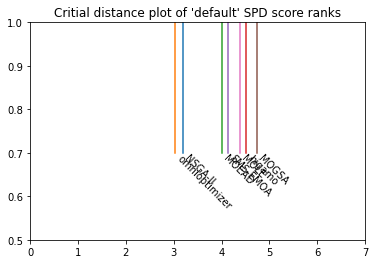

Index(['MOEAD', 'MOGSA', 'MOLE', 'NSGA-II', 'SMS-EMOA', 'higamo',
       'omnioptimizer'],
      dtype='object', name='solver')

[2.6363636363636362,
 3.3636363636363638,
 4.7272727272727275,
 4.666666666666667,
 3.3333333333333335,
 3.787878787878788,
 5.484848484848484]

omnioptimizer    2.636364
MOLE             3.363636
SMS-EMOA         4.727273
NSGA-II          4.666667
MOEAD            3.333333
higamo           3.787879
MOGSA            5.484848
dtype: float64

omnioptimizer 2.6363636363636362
MOLE 3.3636363636363638
SMS-EMOA 4.7272727272727275
NSGA-II 4.666666666666667
MOEAD 3.3333333333333335
higamo 3.787878787878788
MOGSA 5.484848484848484


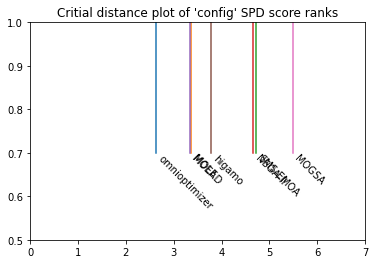

In [144]:
for runtype in ["default", "config"]:
    gdf = df.groupby(["instance","solver"])[runtype].sum().unstack()
    #gdf = gdf.drop(columns="DN-NSGAII")
    
    #gdf = gdf.drop(columns="DN-NSGAII").dropna()
    gdf = gdf[gdf > 0].dropna()
    
    gdf = gdf.fillna(np.inf)
    
    ranks = {}
    for key, row in gdf.iterrows():
        row = row.to_dict()
        ranks[key] = {k: n+1 for n, (k, v) in enumerate(sorted(row.items(), key=lambda item: item[1])[::-1])}

    rdf = pd.DataFrame(ranks)
    ranks = rdf.mean(axis=1)

    names = list(ranks.keys())
    avranks = ranks.tolist()
    display(gdf.columns)
    display(avranks)
    
    display(ranks)
    plt.title(f"Critial distance plot of '{runtype}' {target} score ranks")
    plt.xlim(0,len(ranks))
    plt.ylim(0.5,1)
    for solver, rank in ranks.iteritems():
        print(solver,rank)
        plt.text(rank, 0.7, solver, rotation=-45, ha='left', va='top')
        plt.plot([rank]*2, [0.7,1])
    plt.show()
#     cd = Orange.evaluation.compu,te_CD(avranks, len(rdf), alpha="0.1", test="nemenyi") #tested on 14 datasets 
#     print(f"cd=",cd)
#     Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=6, textspace=1.5, cdmethod=0)
#     plt.title(f"Nemenyi test on '{runtype}' {target} score ranks")
#     plt.show()

In [145]:
for solver, gdf in df.groupby("solver"):
    print(solver)
    for _,r in gdf.iterrows():
        print(r["configuration"].strip().replace(" -","\n-"))
        break

MOEAD
-T '20'
-aggfunction 'awt'
-archive '1'
-decomp 'SLD'
-deltap '0.25356489774465946'
-neighbor 'x'
-update 'standard'
-varop1 'sbx'
-varop1sbxeta '9.149471515856904'
-varop1sbxpc '0.2173690626834308'
-varop2 'diffmut'
-varop2diffmut 'rand'
-varop3 'diffmut'
-varop3diffmut 'wgi'
-varop4 'none'
MOGSA
-exploration_step '0.7782063919471809'
-ls_method 'mo-ls'
-max_no_basins '594'
-max_no_steps_ls '890'
-prec_angle '0.005374862734256512'
-prec_grad '0.005999069761302775'
-prec_norm '0.005812836026929376'
-scale_step '0.2598334878401265'
MOLE
-descent_armijo_factor '0.07751311162852265'
-descent_direction_min '0.29323823732025256'
-descent_history_size '135724952'
-descent_max_iter '1985327308'
-descent_scale_factor '1.29580153688212'
-descent_step_max '1.0121946300017792'
-descent_step_min '0.003923772319082514'
-epsilon_gradient '0.1767724308962545'
-explore_angle_max '86'
-explore_scale_factor '1.254131800377783'
-explore_step_max '93.41173502819498'
-explore_step_min '59.43103087481

In [141]:
gdf = gdf.fillna(np.inf)
#{k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
ranks = {}

for key, row in gdf.iterrows():
    row = row.to_dict()
    ranks[key] = {k: n+1 for n, (k, v) in enumerate(sorted(row.items(), key=lambda item: item[1]))}
    
rdf = pd.DataFrame(ranks)
ranks = rdf.mean(axis=1)

names = list(ranks.keys())
avranks = ranks.tolist()

cd = Orange.evaluation.compute_CD(avranks, 14, alpha="0.05", test="bonferroni-dunn") #tested on 14 datasets 
print("cd=",cd)
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=5, textspace=1.5, cdmethod=0)

list(ranks.keys())

['MOGSA', 'higamo', 'MOEAD', 'NSGA-II', 'SMS-EMOA', 'MOLE', 'omnioptimizer']

cd= 2.490456068388163


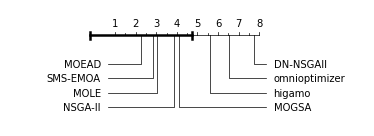

In [98]:
names = list(ranks.keys())
avranks = ranks.tolist()

cd = Orange.evaluation.compute_CD(avranks, 14, alpha="0.05", test="bonferroni-dunn") #tested on 14 datasets 
print("cd=",cd)
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=5, textspace=1.5, cdmethod=0)

In [99]:
rdf

,BiObjBBOB1,BiObjBBOB2,BiObjBBOB3,DTLZ1,DTLZ2,DTLZ3,DTLZ4,DTLZ5,DTLZ6,DTLZ7,...,MMF5,MMF6,MMF7,MMF8,MMF9,ZDT1,ZDT2,ZDT3,ZDT4,ZDT6
MOEAD,1,2,8,1,2,1,4,2,2,1,...,4,2,3,1,1,1,2,1,1,1
NSGA-II,2,4,2,3,5,2,5,4,3,4,...,3,3,5,3,5,4,3,3,3,8
SMS-EMOA,3,3,1,2,4,3,3,3,4,3,...,2,1,4,4,3,2,4,2,4,2
MOGSA,4,5,4,5,1,7,2,1,6,5,...,5,4,1,5,2,5,8,6,5,3
MOLE,5,1,3,4,3,4,1,8,1,2,...,1,5,2,2,4,3,1,4,2,4
higamo,6,6,5,6,7,5,6,6,7,8,...,6,6,7,6,6,7,6,7,6,6
omnioptimizer,7,7,6,7,6,6,7,5,5,6,...,7,7,6,7,7,6,5,5,7,5
DN-NSGAII,8,8,7,8,8,8,8,7,8,7,...,8,8,8,8,8,8,7,8,8,7


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikit_posthocs as sp
from scipy import stats
import re
#import Orange

def getBenchmarkSet(name):
    m = re.match("([a-zA-z]+)",name)
    if m is not None:
        return m.group(0)
    return ""

# RESULTS FROM VALIDATATION OVER MULTIPLE RUNS

In [2]:
df = pd.read_csv(f"results.csv")
df["benchmark"] = df["instance"].apply(getBenchmarkSet)
df = df.drop(columns="Unnamed: 0")
df["config"] = df["solver"].apply(lambda x: "config-"+x.split("_")[-1])
df["solver"] = df["solver"].apply(lambda x: "_".join(x.split("_")[:-1]))
df.loc[df["configuration"].isna(),"config"] = "default"
df

NameError: name 'getBenchmarkSet' is not defined

In [9]:
mdf = df.groupby(["config","solver","instance"])["HV","SPD"].mean().unstack("config")
mdf = mdf.swaplevel(0, 1, 1).sort_index(1)

mdf = mdf.dropna() #Remove instances where no results are for yet

/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_1914/2140749997.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mdf = df.groupby(["config","solver","instance"])["HV","SPD"].mean().unstack("config")
/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_1914/2140749997.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  mdf = mdf.swaplevel(0, 1, 1).sort_index(1)


## Configuration to maximise hypervolume(HV)

In [10]:
tdf = (100*(mdf["config-HV"] - mdf["default"] ) / mdf["default"]).reset_index()
for target in ["HV","SPD"]:
    #df.groupby(["instance","solver"])["config"].sum().unstack().astype(float)
    #target = "HV"
    display(tdf.groupby("solver")[target].describe())
    
    fig, ax = plt.subplots(figsize=(6,3))
    sns.boxplot(x="solver",y=f"{target}",data=tdf)

    ax.set_title(f"Procentual improvement after configuration [{target}]")
    ax.set_ylabel("Difference [%]")
    ax.set_xlabel("Solver")
    ax.set_ylim(-50,100)
    ax.hlines([p for p in range(-100,100,25)],*ax.get_xlim(),color=(0.8,0.8,0.8),ls="--",zorder=-10)
    plt.tight_layout()
    plt.savefig(f"figures/boxplot_configHV_{target}.pdf")
    plt.show()

,count,mean,std,min,25%,50%,75%,max
solver,,,,,,,,
MOEAD,33.0,0.571687,5.241030,-15.253255,0.002095,0.103509,1.398787,19.966009
MOGSA,31.0,21.347882,68.449379,-54.938974,0.027529,1.436541,20.672864,353.753850
MOLE,31.0,21.776879,40.195266,-31.280050,-5.277066,-0.006403,51.360143,97.541490
NSGA-II,33.0,-0.195467,0.879162,-4.989823,-0.024673,-0.001373,0.008959,0.067030
SMS-EMOA,33.0,0.034870,4.303040,-8.713723,-0.616608,-0.085715,-0.010974,19.681559
higamo,33.0,14.595411,72.613359,-36.432372,-3.836445,0.000141,4.684371,307.098538
omnioptimizer,33.0,-0.056103,0.325584,-1.705024,-0.016465,-0.000038,0.013972,0.340769


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_1914/1395891665.py:17: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


,count,mean,std,min,25%,50%,75%,max
solver,,,,,,,,
MOEAD,33.0,2.010666,11.260307,-31.664527,-2.759767,-0.709077,6.998574,30.862136
MOGSA,31.0,10.317271,19.618718,-6.614212,-0.482037,0.627132,12.236361,78.461817
MOLE,31.0,34.287404,58.322651,-7.947516,-0.282234,2.927265,63.376610,209.369989
NSGA-II,33.0,-0.502979,1.840636,-6.624814,-1.143118,-0.349457,-0.066929,2.809817
SMS-EMOA,33.0,-2.680689,6.147671,-14.100395,-9.664617,-0.884880,1.997029,11.550933
higamo,33.0,3.628482,15.183647,-45.257347,-1.456847,0.034275,9.674326,50.066151
omnioptimizer,33.0,0.394137,1.031919,-2.212160,-0.019444,0.014748,0.922947,3.576323


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_1914/1395891665.py:17: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


## Configuration to maximise Solow-Polasky (SPD)

,count,mean,std,min,25%,50%,75%,max
solver,,,,,,,,
MOEAD,33.0,-18.997643,19.249410,-65.300915,-31.454494,-7.399322,-4.459700,1.427767
MOGSA,31.0,6.456039,74.740795,-69.220235,-26.827932,-0.078578,5.748217,367.781411
MOLE,31.0,16.761750,37.386016,-29.010668,-7.113632,-0.009416,35.361357,93.743573
NSGA-II,33.0,-0.020994,0.713979,-2.165457,-0.016907,-0.000024,0.004461,3.254337
SMS-EMOA,33.0,0.624897,2.596900,-2.505023,-0.006126,-0.001228,0.000279,12.217468
higamo,33.0,28.326405,67.657297,-13.266898,0.008241,2.392448,30.795398,278.124031
omnioptimizer,33.0,-7.703072,6.460743,-22.577580,-11.865080,-6.032461,-2.305402,-0.203965


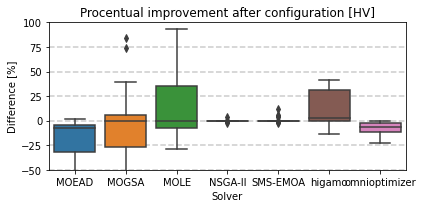

,count,mean,std,min,25%,50%,75%,max
solver,,,,,,,,
MOEAD,33.0,17.296461,18.935531,0.951773,7.329710,12.487850,21.009626,90.265979
MOGSA,31.0,6.188122,10.612931,-3.159304,-0.544288,1.303779,9.973053,39.702707
MOLE,31.0,33.073190,55.373126,-9.029582,-0.117779,2.068402,55.311348,203.070359
NSGA-II,33.0,1.409652,6.337144,-9.568129,-1.021991,-0.291176,1.409688,28.986094
SMS-EMOA,33.0,3.827886,6.429860,-0.615620,-0.157803,1.261540,4.585626,24.147533
higamo,33.0,13.366208,18.353398,-6.575368,0.065129,3.248139,23.056284,54.714291
omnioptimizer,33.0,15.176090,31.918605,-1.730826,1.567606,8.536992,14.548455,180.996174


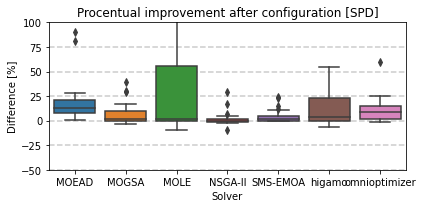

In [8]:
tdf = (100*(mdf["config-SPD"] - mdf["default"] ) / mdf["default"]).reset_index()
for target in ["HV","SPD"]:
    #df.groupby(["instance","solver"])["config"].sum().unstack().astype(float)
    #target = "HV"
    display(tdf.groupby("solver")[target].describe())
    
    fig, ax = plt.subplots(figsize=(6,3))
    sns.boxplot(x="solver",y=f"{target}",data=tdf)
    ax.set_title(f"Procentual improvement after configuration [{target}]")
    ax.set_ylabel("Difference [%]")
    ax.set_xlabel("Solver")
    ax.set_ylim(-50,100)
    ax.hlines([p for p in range(-100,100,25)],*ax.get_xlim(),color=(0.8,0.8,0.8),ls="--",zorder=-10)
    plt.tight_layout()
    plt.savefig(f"figures/boxplot_configSP_{target}.pdf")
    plt.show()

In [2]:
# Author: Hassan Ismail Fawaz <hassan.ismail-fawaz@uha.fr>
#         Germain Forestier <germain.forestier@uha.fr>
#         Jonathan Weber <jonathan.weber@uha.fr>
#         Lhassane Idoumghar <lhassane.idoumghar@uha.fr>
#         Pierre-Alain Muller <pierre-alain.muller@uha.fr>
# License: GPL3

import numpy as np
import pandas as pd
import matplotlib

matplotlib.use('agg')
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Arial'

import operator
import math
from scipy.stats import wilcoxon
from scipy.stats import friedmanchisquare
import networkx

# inspired from orange3 https://docs.orange.biolab.si/3/data-mining-library/reference/evaluation.cd.html
def graph_ranks(avranks, names, p_values, cd=None, cdmethod=None, lowv=None, highv=None,
                width=6, textspace=1, reverse=False, filename=None, labels=False, **kwargs):
    """
    Draws a CD graph, which is used to display  the differences in methods'
    performance. See Janez Demsar, Statistical Comparisons of Classifiers over
    Multiple Data Sets, 7(Jan):1--30, 2006.
    Needs matplotlib to work.
    The image is ploted on `plt` imported using
    `import matplotlib.pyplot as plt`.
    Args:
        avranks (list of float): average ranks of methods.
        names (list of str): names of methods.
        cd (float): Critical difference used for statistically significance of
            difference between methods.
        cdmethod (int, optional): the method that is compared with other methods
            If omitted, show pairwise comparison of methods
        lowv (int, optional): the lowest shown rank
        highv (int, optional): the highest shown rank
        width (int, optional): default width in inches (default: 6)
        textspace (int, optional): space on figure sides (in inches) for the
            method names (default: 1)
        reverse (bool, optional):  if set to `True`, the lowest rank is on the
            right (default: `False`)
        filename (str, optional): output file name (with extension). If not
            given, the function does not write a file.
        labels (bool, optional): if set to `True`, the calculated avg rank
        values will be displayed
    """
    try:
        import matplotlib
        import matplotlib.pyplot as plt
        from matplotlib.backends.backend_agg import FigureCanvasAgg
    except ImportError:
        raise ImportError("Function graph_ranks requires matplotlib.")

    width = float(width)
    textspace = float(textspace)

    def nth(l, n):
        """
        Returns only nth elemnt in a list.
        """
        n = lloc(l, n)
        return [a[n] for a in l]

    def lloc(l, n):
        """
        List location in list of list structure.
        Enable the use of negative locations:
        -1 is the last element, -2 second last...
        """
        if n < 0:
            return len(l[0]) + n
        else:
            return n

    def mxrange(lr):
        """
        Multiple xranges. Can be used to traverse matrices.
        This function is very slow due to unknown number of
        parameters.
        >>> mxrange([3,5])
        [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
        >>> mxrange([[3,5,1],[9,0,-3]])
        [(3, 9), (3, 6), (3, 3), (4, 9), (4, 6), (4, 3)]
        """
        if not len(lr):
            yield ()
        else:
            # it can work with single numbers
            index = lr[0]
            if isinstance(index, int):
                index = [index]
            for a in range(*index):
                for b in mxrange(lr[1:]):
                    yield tuple([a] + list(b))

    def print_figure(fig, *args, **kwargs):
        canvas = FigureCanvasAgg(fig)
        canvas.print_figure(*args, **kwargs)

    sums = avranks

    nnames = names
    ssums = sums

    if lowv is None:
        lowv = min(1, int(math.floor(min(ssums))))
    if highv is None:
        highv = max(len(avranks), int(math.ceil(max(ssums))))

    cline = 0.4

    k = len(sums)

    lines = None

    linesblank = 0
    scalewidth = width - 2 * textspace

    def rankpos(rank):
        if not reverse:
            a = rank - lowv
        else:
            a = highv - rank
        return textspace + scalewidth / (highv - lowv) * a

    distanceh = 0.25

    cline += distanceh

    # calculate height needed height of an image
    minnotsignificant = max(2 * 0.2, linesblank)
    height = cline + ((k + 1) / 2) * 0.2 + minnotsignificant

    fig = plt.figure(figsize=(width, height))
    fig.set_facecolor('white')
    ax = fig.add_axes([0, 0, 1, 1])  # reverse y axis
    ax.set_axis_off()

    hf = 1. / height  # height factor
    wf = 1. / width

    def hfl(l):
        return [a * hf for a in l]

    def wfl(l):
        return [a * wf for a in l]

    # Upper left corner is (0,0).
    ax.plot([0, 1], [0, 1], c="w")
    ax.set_xlim(0, 1)
    ax.set_ylim(1, 0)

    def line(l, color='k', **kwargs):
        """
        Input is a list of pairs of points.
        """
        ax.plot(wfl(nth(l, 0)), hfl(nth(l, 1)), color=color, **kwargs)

    def text(x, y, s, *args, **kwargs):
        ax.text(wf * x, hf * y, s, *args, **kwargs)

    line([(textspace, cline), (width - textspace, cline)], linewidth=2)

    bigtick = 0.3
    smalltick = 0.15
    linewidth = 2.0
    linewidth_sign = 4.0

    tick = None
    for a in list(np.arange(lowv, highv, 0.5)) + [highv]:
        tick = smalltick
        if a == int(a):
            tick = bigtick
        line([(rankpos(a), cline - tick / 2),
              (rankpos(a), cline)],
             linewidth=2)

    for a in range(lowv, highv + 1):
        text(rankpos(a), cline - tick / 2 - 0.05, str(a),
             ha="center", va="bottom", size=16)

    k = len(ssums)

    def filter_names(name):
        return name

    space_between_names = 0.24

    for i in range(math.ceil(k / 2)):
        chei = cline + minnotsignificant + i * space_between_names
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textspace - 0.1, chei)],
             linewidth=linewidth)
        if labels:
            text(textspace + 0.3, chei - 0.075, format(ssums[i], '.4f'), ha="right", va="center", size=10)
        text(textspace - 0.2, chei, filter_names(nnames[i]), ha="right", va="center", size=16)

    for i in range(math.ceil(k / 2), k):
        chei = cline + minnotsignificant + (k - i - 1) * space_between_names
        line([(rankpos(ssums[i]), cline),
              (rankpos(ssums[i]), chei),
              (textspace + scalewidth + 0.1, chei)],
             linewidth=linewidth)
        if labels:
            text(textspace + scalewidth - 0.3, chei - 0.075, format(ssums[i], '.4f'), ha="left", va="center", size=10)
        text(textspace + scalewidth + 0.2, chei, filter_names(nnames[i]),
             ha="left", va="center", size=16)

    # no-significance lines
    def draw_lines(lines, side=0.05, height=0.1):
        start = cline + 0.2

        for l, r in lines:
            line([(rankpos(ssums[l]) - side, start),
                  (rankpos(ssums[r]) + side, start)],
                 linewidth=linewidth_sign)
            start += height
            print('drawing: ', l, r)

    # draw_lines(lines)
    start = cline + 0.2
    side = -0.02
    height = 0.1

    # draw no significant lines
    # get the cliques
    cliques = form_cliques(p_values, nnames)
    i = 1
    achieved_half = False
    print(nnames)
    for clq in cliques:
        if len(clq) == 1:
            continue
        print(clq)
        min_idx = np.array(clq).min()
        max_idx = np.array(clq).max()
        if min_idx >= len(nnames) / 2 and achieved_half == False:
            start = cline + 0.25
            achieved_half = True
        line([(rankpos(ssums[min_idx]) - side, start),
              (rankpos(ssums[max_idx]) + side, start)],
             linewidth=linewidth_sign)
        start += height


def form_cliques(p_values, nnames):
    """
    This method forms the cliques
    """
    # first form the numpy matrix data
    m = len(nnames)
    g_data = np.zeros((m, m), dtype=np.int64)
    for p in p_values:
        if p[3] == False:
            i = np.where(nnames == p[0])[0][0]
            j = np.where(nnames == p[1])[0][0]
            min_i = min(i, j)
            max_j = max(i, j)
            g_data[min_i, max_j] = 1

    g = networkx.Graph(g_data)
    return networkx.find_cliques(g)


def draw_cd_diagram(df_perf=None, alpha=0.05, title=None, labels=False, saveat="cd-diagram.png"):
    """
    Draws the critical difference diagram given the list of pairwise classifiers that are
    significant or not
    """
    p_values, average_ranks, _ = wilcoxon_holm(df_perf=df_perf, alpha=alpha)

    print(average_ranks)

    for p in p_values:
        print(p)


    graph_ranks(average_ranks.values, average_ranks.keys(), p_values,
                cd=None, reverse=True, width=9, textspace=1.5, labels=labels)

    font = {'family': 'sans-serif',
        'color':  'black',
        'weight': 'normal',
        'size': 22,
        }
    if title:
        plt.title(title,fontdict=font, y=0.9, x=0.5)
    plt.savefig(saveat,bbox_inches='tight')

def wilcoxon_holm(alpha=0.05, df_perf=None):
    """
    Applies the wilcoxon signed rank test between each pair of algorithm and then use Holm
    to reject the null's hypothesis
    """
    print(pd.unique(df_perf['classifier_name']))
    # count the number of tested datasets per classifier
    df_counts = pd.DataFrame({'count': df_perf.groupby(
        ['classifier_name']).size()}).reset_index()
    # get the maximum number of tested datasets
    max_nb_datasets = df_counts['count'].max()
    # get the list of classifiers who have been tested on nb_max_datasets
    classifiers = list(df_counts.loc[df_counts['count'] == max_nb_datasets]
                       ['classifier_name'])
    # test the null hypothesis using friedman before doing a post-hoc analysis
    friedman_p_value = friedmanchisquare(*(
        np.array(df_perf.loc[df_perf['classifier_name'] == c]['accuracy'])
        for c in classifiers))[1]
    if friedman_p_value >= alpha:
        # then the null hypothesis over the entire classifiers cannot be rejected
        print('the null hypothesis over the entire classifiers cannot be rejected')
        exit()
    # get the number of classifiers
    m = len(classifiers)
    # init array that contains the p-values calculated by the Wilcoxon signed rank test
    p_values = []
    # loop through the algorithms to compare pairwise
    for i in range(m - 1):
        # get the name of classifier one
        classifier_1 = classifiers[i]
        # get the performance of classifier one
        perf_1 = np.array(df_perf.loc[df_perf['classifier_name'] == classifier_1]['accuracy']
                          , dtype=np.float64)
        for j in range(i + 1, m):
            # get the name of the second classifier
            classifier_2 = classifiers[j]
            # get the performance of classifier one
            perf_2 = np.array(df_perf.loc[df_perf['classifier_name'] == classifier_2]
                              ['accuracy'], dtype=np.float64)
            # calculate the p_value
            p_value = wilcoxon(perf_1, perf_2, zero_method='pratt')[1]
            # appen to the list
            p_values.append((classifier_1, classifier_2, p_value, False))
    # get the number of hypothesis
    k = len(p_values)
    # sort the list in acsending manner of p-value
    p_values.sort(key=operator.itemgetter(2))

    # loop through the hypothesis
    for i in range(k):
        # correct alpha with holm
        new_alpha = float(alpha / (k - i))
        # test if significant after holm's correction of alpha
        if p_values[i][2] <= new_alpha:
            p_values[i] = (p_values[i][0], p_values[i][1], p_values[i][2], True)
        else:
            # stop
            break
    # compute the average ranks to be returned (useful for drawing the cd diagram)
    # sort the dataframe of performances
    sorted_df_perf = df_perf.loc[df_perf['classifier_name'].isin(classifiers)]. \
        sort_values(['classifier_name', 'dataset_name'])
    # get the rank data
    rank_data = np.array(sorted_df_perf['accuracy']).reshape(m, max_nb_datasets)

    # create the data frame containg the accuracies
    df_ranks = pd.DataFrame(data=rank_data, index=np.sort(classifiers), columns=
    np.unique(sorted_df_perf['dataset_name']))

    # number of wins
    dfff = df_ranks.rank(ascending=False)
    print(dfff[dfff == 1.0].sum(axis=1))

    # average the ranks
    average_ranks = df_ranks.rank(ascending=False).mean(axis=1).sort_values(ascending=False)
    # return the p-values and the average ranks
    return p_values, average_ranks, max_nb_datasets

In [3]:
cddf = mdf["default"]["HV"].reset_index()
cddf = cddf.rename(columns={'solver': 'classifier_name', 'instance': 'dataset_name', 'HV': 'accuracy'})
draw_cd_diagram(df_perf=cddf, title='default HV', labels=True, saveat="figures/cdp_default_HV.pdf")

cddf = mdf["config-HV"]["HV"].reset_index()
cddf = cddf.rename(columns={'solver': 'classifier_name', 'instance': 'dataset_name', 'HV': 'accuracy'})
draw_cd_diagram(df_perf=cddf, title='config HV', labels=True, saveat="figures/cdp_configHV_HV.pdf")

cddf = mdf["default"]["SPD"].reset_index()
cddf = cddf.rename(columns={'solver': 'classifier_name', 'instance': 'dataset_name', 'SPD': 'accuracy'})
draw_cd_diagram(df_perf=cddf, title='default SP', labels=True, saveat="figures/cdp_default_SPD.pdf")

cddf = mdf["config-SPD"]["SPD"].reset_index()
cddf = cddf.rename(columns={'solver': 'classifier_name', 'instance': 'dataset_name', 'SPD': 'accuracy'})
draw_cd_diagram(df_perf=cddf, title='config SP', labels=True, saveat="figures/cdp_configSPD_SPD.pdf")

NameError: name 'mdf' is not defined

In [157]:
#df_perf = pd.read_csv('DefaultvsTunedvsEnsembleCritDiffAcc.csv',index_col=False)

draw_cd_diagram(df_perf=mdf["config-HV"]["HV"].reset_index(), title='Accuracy', labels=True)

KeyError: 'classifier_name'